<img style="float: left; width: 200px;" src="images/title1.png">
***
# <font color="grey">    Lecture 1 - What is optimization? </font>
***

>"[N]othing at all takes place in the universe in which some rule of maximum or minimum does not appear." 
>
>-- Leonhard Euler

**Mathematical optimization**, traditionally also known as mathematical programming, is the theory of optimal decision making. Optimization problems arise in a large variety of contexts, including **scheduling and logistics**, **finance**, **optimal control**, **signal processing**, and **machine learning**. The underlying mathematical problem always amounts to finding parameters that **minimize** (cost) or **maximize** (utility) an objective function in the presence or absence of a set of constraints.
An important special case is the class of **convex optimization** problems. Such problems will be the main focus of this course.
$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\text{minimize}\quad}$
$\newcommand{\maximize}{\text{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$

---
## <font color="grey">What is an optimization problem?</font>
---

A general mathematical optimization problem is a problem of the form

\begin{align*}
\begin{split}
 \minimize & f(\vct{x})\\
 \subjto & \vct{x}\in \Omega
 \end{split}
\end{align*}

where $f\colon \R^n\to \R$ is a real-valued **objective function** and $\Omega\subseteq \R^n$ is a set defining the **constraints**. Among all vectors $\vct{x}\in \Omega$, we seek one with smallest $f$-value. Typically, the constraint set $\Omega$ will consist of such $\vct{x}\in \R^n$ that satisfy certain equations and inequalities,

\begin{equation*}
f_1(\vct{x})\leq 0, \dots, f_m(\vct{x})\leq 0, g_1(\vct{x})=0, \dots, g_p(\vct{x})=0.
\end{equation*}

A vector $\vct{x}^*$ satisfying the constraints is called an **optimum**, a **solution**, or a **minimizer** of the problem, if $f(\vct{x}^*)\leq f(\vct{x})$ for all other $\vct{x}\in \Omega$. Note that replacing $f$ by $-f$, we could equivalently state the problem as a maximization problem. In this course we are mostly concerned with functions and constraint sets that are **convex**.

* A set $C\subseteq \R^n$ is **convex**, if for all $\vct{x},\vct{y}\in C$ and $\lambda\in [0,1]$, $\lambda \vct{x}+(1-\lambda)\vct{y}\in C$. That is, if for any two points in $C$, the line segment connecting them is also in $C$. 
* A function $f\colon C\to \R$ is convex, if $C$ is convex and for all $\vct{x}\in C$ and $\lambda\in [0,1]$, $f(\lambda \vct{x}+(1-\lambda)\vct{y})\leq \lambda f(\vct{x})+(1-\lambda)f(\vct{y})$. 

![Convex set](images/convset.png)

A **convex optimization** problem is one where the set of constraints $\Omega$ and the function $f$ are convex. While most general optimization problems are practically intractable, convex optimization problems can be solved efficiently, and still cover a surprisingly large range of applications!

---
## <font color="grey">Examples of convex optimization problems</font>
---
Countless problems from science and engineering can be cast as convex optimization problems. We present a few first examples, many more will follow in the course of this lecture. The examples below come with associated Python code. At this moment it is not expected that you understand them in detail, they are merely intended to illustrate some of the problems that convex optimization deals with, and how they can be solved.

### <font color="grey">A first example: linear regression</font>
---

Suppose we want to understand the relationship of a quantity $Y$ (for example, sales data) to a series of **predictors** $X_1,\dots,X_p$ (for example, advertising budget in different media). We can often assume the relationship to be **approximately linear**,

[1]\begin{equation*}
 Y = \beta_0+\beta_1 X_1 + \cdots + \beta_p X_p + \varepsilon, 
\end{equation*}

where $\varepsilon$ is some error or noise term. The goal is to determine the **model parameters** $\beta_0,\dots,\beta_p$.
To determine these, we can collect $n\geq p$ sample realizations (from observations or experiments),

\begin{equation*}
 Y=y_i, \quad X_1=x_{i1},\dots,X_p=x_{ip}, \quad 1\leq i\leq n,
\end{equation*}

and assume that the data is related according to [1], 

\begin{equation*}
 y_i = \beta_0+\beta_1x_{i1}+\cdots +\beta_p x_{ip}+\varepsilon_i, \quad 1\leq i\leq n.
\end{equation*}

Collecting the data in matrices and vectors,

\begin{equation*}
 \vct{y} = \begin{pmatrix}
            y_1\\ \vdots \\ y_n
           \end{pmatrix},
\quad \mtx{X} = \begin{pmatrix} 
           1 & x_{11} & \cdots & x_{1p}\\
           \vdots & \vdots & \ddots & \vdots \\
           1 & x_{n1} & \cdots & x_{np}
          \end{pmatrix},
\quad \vct{\beta} = \begin{pmatrix}
                     \beta_0\\
                     \beta_1\\
                     \vdots\\
                     \beta_p
                    \end{pmatrix},
\quad \vct{\varepsilon} = \begin{pmatrix}
                  \e_1\\
                  \vdots\\
                  \e_n
                 \end{pmatrix},
\end{equation*}

we can write the relationship concisely as 

\begin{equation*}
 \vct{y} = \mtx{X}\vct{\beta}+\vct{\e}.
\end{equation*}

We would then like to find $\vct{\beta}$ in such a way that the difference $\vct{\e}=\vct{y}-\mtx{X}\vct{\beta}$ is as *small* as possible. One way of measuring the size of a vector $\vct{x}\in \R^n$ is the square of its **$2$-norm**, or Euclidean norm, 

\begin{equation*}
 \norm{\vct{x}}_2^2=\vct{x}^{T}\vct{x}=\sum_{i=1}^nx_i^2.
\end{equation*}

The best $\vct{\beta}$ is then the vector that solves the unconstrained optimization problem

\begin{equation*}
 \minimize \norm{\mtx{X}\vct{\beta}-\vct{y}}_2^2.
\end{equation*}

This is an example of an optimization problem, with variables $\vct{\beta}$, no constraints (*all* $\beta$ are valid candidates and the constraint set is $\Omega=\R^{p+1}$), and a **quadratic** objective function 

\begin{equation*}
f(\vct{\beta})=\norm{\mtx{X}\vct{\beta}-\vct{y}}_2^2 = (\mtx{X}\vct{\beta}-\vct{y})^{T}(\mtx{X}\vct{\beta}-\vct{y}) = \vct{\beta}^{T}\mtx{X}^{T}\mtx{X}\vct{\beta}-2\vct{y}^{T}\mtx{X}\vct{\beta}+\vct{y}^{T}\vct{y},
\end{equation*}

where $\mtx{X}^{T}$ is the matrix transpose.
As we will see later, quadratic functions are convex, so this is a convex optimization problem.
This simple optimization problem has a **unique closed form solution**,

\begin{equation*}
 \vct{\beta}^* = (\vct{X}^{\trans}\vct{X})^{-1}\vct{X}^{\trans}\vct{y}.
\end{equation*}

In practice one wouldn't compute $\vct{\beta}^*$ by evaluating [1], as there are more efficient methods available (see Lecture 2). 

To illustrate the least squares setting using a concrete example, assume that we have data relating the basal metabolic rate (energy expenditure per time unit) in mammals to their mass (this example is from the episode ``[Size Matters](http://www.bbc.co.uk/programmes/b01qygxz)'' of the BBC series Wonders of Life.)

![Brian Cox](images/briancox-smaller.png)

The model we use is $Y=\beta_0+\beta_1X$, with $Y$ the basal metabolic rate and $X$ the mass. Using data for 573 mammals from the [PanTHERIA database](http://esapubs.org/archive/ecol/E090/184/\#data), we can assemble the vector $\vct{y}$ and the matrix $\mtx{X}\in \R^{n\times (p+1)}$ in order to compute the $\vct{\beta}=(\beta_0,\beta_1)^{\trans}$. Here, $p=1$ and $n=573$.

We next illustrate how to solve this problem in Python. As usual, we first have to import some relevant libraries: **numpy** for numerical computation, **pandas** for loading and transforming datasets, **cvxpy** for convex optimization, and **matplotlib** for plotting.

In [1]:
# Import some important Python modules that we will be using in this notebook
import numpy as np
import pandas as pd
from cvxpy import *
import matplotlib.pyplot as plt

We next have to load the data. The data is saved in a table with 573 rows and 2 columns, where the first column list the mass and the second the basal metabolic rate.

In [2]:
# Load data into numpy array
bmr = pd.read_csv('data/bmr.csv',header=None).as_matrix()
# We can find out the dimension of the data using the shape attribute
bmr.shape

(573L, 2L)

To see the first three and the last three rows of the dataset, we can use the "print" command.

In [3]:
print(bmr[0:3,:])

[[ 13.108   10.604 ]
 [  9.3918   8.2158]
 [ 10.366    9.3285]]


To visualise the whole dataset, we can make a scatterplot by interpreting each row as a coordinate on the plane, and marking it with a dot.

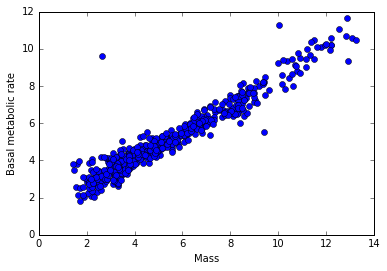

In [4]:
# Display scatterplot of data (plot all the rows as points on the plane)
% matplotlib inline
bmr1 = plt.plot(bmr[:,0],bmr[:,1],'o')
plt.xlabel("Mass")
plt.ylabel("Basal metabolic rate")
plt.show()

The plot above suggests that the relation of the basal metabolic rate to the mass is linear, i.e., of the form
\begin{equation*}
  Y = \beta_0+\beta_1 X,
\end{equation*}
where X is the mass and Y the BMR. We can find $\beta_0$ and $\beta_1$ by solving an optimization problem as described above. We first have to assemble the matrix $\mtx{X}$ and the vector $\vct{y}$.

In [5]:
n = bmr.shape[0]
p = 1
X = np.concatenate((np.ones((n,1)),bmr[:,0:p]),axis=1)
y = bmr[:,-1]

In [6]:
# Create a (p+1) vector of variables
Beta = Variable(p+1)

# Create sum-of-squares objective function
objective = Minimize(sum_entries(square(X*Beta - y)))

# Create problem and solve it
prob = Problem(objective)
prob.solve()

print("status: ", prob.status)
print("optimal value: ", prob.value)
print("optimal variables: ", Beta[0].value, Beta[1].value)

('status: ', 'optimal')
('optimal value: ', 152.736200529558)
('optimal variables: ', 1.3620698558275837, 0.7016170245505547)


Now that we solved the problem and have the values $\beta_0 = 1.362$ and $\beta_1 = 0.702$, we can plot the line and see how it fits the data.

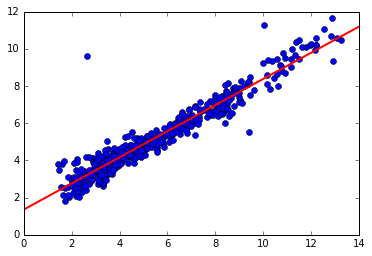

In [7]:
plt.plot(bmr[:,0],bmr[:,1],'o')

xx = np.linspace(0,14,100)
bmr = plt.plot(xx, Beta[0].value+Beta[1].value*xx, color='red', linewidth=2)
plt.show()

Even though for illustration purposes we used the CVXPY package, this particular problem can be solved directly using the least squares solver in numpy.

In [8]:
import numpy.linalg as la
beta = la.lstsq(X,y)
print(beta[0])

[ 1.36206997  0.70161692]


### <font color="grey">Machine Learning</font>
---

The above example is an example of a **machine learning** problem. In machine learning, one seeks to **learn** a function $F$ mapping some inputs $X$ to outputs $Y$, $Y=F(X)$. A few examples:
* X: economic data, Y: value of a stock;
* X: physiological data, Y: medical diagnosis;
* X: email, Y: 1 if email is span, 0 otherwise;
* X: scanned image, Y: a letter represented by that image.

In **supervised learning** we have a set of sample input pairs, $(y_i,x_i)$, $1\leq i\leq m$, and we typically try to find a function $F$ that minimizes the **least squared error**,

\begin{equation*}
  \minimize \sum_{i=1}^m (\vct{y}_i-F(\vct{x}_i))^2,
\end{equation*}

where one minimizes over all functions $F$ from some class. In the above example, we assumed our functions to be linear, in which case the can by parametrized by the coefficients $\beta_0, \dots,\beta_p$. As the course progresses, we will see examples of more sophisticated machine learning problems, often with nonlinear objective function and other **loss functions** instead of the least square error. 

### <font color="grey">A second example: linear programming</font>
---
Suppose a plane has two cargo compartments with weight capacities $C_1=35$ and $C_2=40$ tonnes, and volumes (space capacities) $V_1=250$ and $V_2=400$ cubic metres. Assume we have three types of cargo to transport, specified as follows.
 
 |          | Volume (m$^3$ per tonne) | Weight (tonnes) | Profit (£ / tonne)|
 |---------:|--------------------------|-----------------|-------------------------| 
 | Cargo 1  |   8                      |  25             | £ 300           |
 | Cargo 2  |  10                      |  32             | £ 350           |
 | Cargo 3  |   7                      |  28             | £ 270           |
  
 The problem is now to decide how much of each cargo to take on board, and how to distribute it in an optimal way among the two compartments.
 1. The **decision variables** $x_{ij}$ specify the amount, in tonnes, of cargo $i$ to go into compartment $j$. We collect them in a vector $\vct{x}$.
 2. The **objective function** is the total profit, 
 
  \begin{equation*}
   f(\vct{x}) = 300\cdot (x_{11}+x_{12})+ 350\cdot (x_{21}+x_{22})+270\cdot (x_{31}+x_{32}).
  \end{equation*}
 
 
 3. The **constraints** are given by the space and weight limitations of the compartments, and the amount of cargo available.

\begin{align*}
 x_{11}+x_{12} & \leq 25 \quad \text{ (total amount of cargo 1)}\\ 
 x_{21}+x_{22} & \leq 32 \quad \text{ (total amount of cargo 2)}\\ 
 x_{31}+x_{32} & \leq 28 \quad \text{ (total amount of cargo 3)}\\
 x_{11}+x_{21}+x_{31} & \leq 35 \quad \text{ (weight constraint on compartment 1)}\\
 x_{12}+x_{22}+x_{32} & \leq 40 \quad \text{ (weight constraint on compartment 2)}\\
 8x_{11}+10x_{21}+7x_{31} & \leq 250 \quad \text{ (volume constraint on compartment 1)}\\
 8x_{12}+10x_{22}+7x_{32} & \leq 400 \quad \text{ (volume constraint on compartment 2)}\\
 (x_{11}+x_{21}+x_{31})/35 - (x_{12}+x_{22}+x_{32})/40 &= 0 \quad \text{ (maintain balance of weight ratio)}\\
 x_{ij} &\geq 0 \quad \text{ (cargo can't have negative weight)}
\end{align*}

 It is customary to write the objective function as a scalar product, $f(\vct{x}) = \ip{\vct{c}}{\vct{x}} := \vct{c}^{\trans}\vct{x}$, and to express the constraints as systems of linear equations and inequalities using matrix-vector products,

\begin{align*}
  \maximize &\ip{\vct{c}}{\vct{x}} \\
  \subjto &A\vct{x}\leq \vct{b}\\
  & B\vct{x} = \vct{d}\\
          & \vct{x}\geq 0        
 \end{align*}

where the inequalities $\geq$ and $\leq$ are to be understood componentwise.
 This problem has a unique solution that can be found using CVXPY in Python.
 

In [14]:
# Define all the matrices and vectors involved
c = np.array([300,300,350,350,270,270])
A = np.array([[1, 1, 0, 0, 0, 0],
              [0, 0, 1, 1, 0, 0],
              [0, 0, 0, 0, 1, 1],
              [1, 0, 1, 0, 1, 0],
              [0, 1, 0, 1, 0, 1],
              [8, 0, 10, 0, 7, 0],
              [0, 8, 0, 10, 0, 7]])
b = np.array([25,32,28,35,40,250,400]);
B = np.array([1/35, -1/40, 1/35, -1/40, 1/35, -1/40]);
d = np.zeros(1)

# Create variables, objective and constraints
x = Variable(6)
constraints = [A*x <= b, B*x == d, x >= 0]
objective = Maximize(c*x)

# Create a problem using the objective and constraints and solve it
prob = Problem(objective, constraints)
prob.solve()

print "Solution found: \n", np.round(np.abs(x.value), decimals=2).transpose()[0]

Solution found: 
[  6.75   0.     0.     0.    28.     0.  ]


In summary, the solution found is
 \begin{equation*}
 x_{11} = 6.75 , x_{12} =  7.71, x_{21} = 0, x_{22} = 32, x_{31} = 28, x_{32} = 0.
 \end{equation*}

 We made some simplifying assumptions, for example that the cargo can be split up into arbitrary fractions. Additional work is required to resolve these issues.
 Problems of this kind are known as **linear programming**, because the objective function and the constraints are given by linear functions. Such problems can be solved efficiently using the simplex algorithm or interior point methods. The highly developed theory of linear programming acts as a template for more general convex optimization that is developed in this course.

### <font color="grey">A third example: image inpainting</font>
---
Optimization methods play an increasingly important role in image and signal processing. An image can be viewed as an $m\times n$ matrix $\mtx{U}$, with each entry $u_{ij}$ corresponding to a light intensity (for greyscale images), or a colour vector, represented by a triple of red, green and blue intensities (usually with values between $0$ and $255$ each). For simplicity the following discussion assumes a greyscale image. For compututational pursposes, the matrix of an image is often viewed as an $mn$-dimensional vector $\vct{u}$, with the columns of the matrix stacked on top of each other. 

In the **image inpainting** problem, one aims to *guess* the true value of missing or corrupted entries of an image. There are different approaches to this problem. A conceptually simple approach is to replace the image with the *closest* image among a set of images satisfying typical properties. But what are typical properties of a typical image? Some properties that come to mind are:

* Images tend to have large homogeneous areas in which the colour doesn't change much;
* Images have approximately low rank, when interpreted as matrices.

Total variation image analysis takes advantage of the first property. The **total variation** or TV-norm is the sum of the norm of the horizontal and vertical differences,

\begin{equation*}
  \|\vct{U}\|_{\mathrm{TV}} = \sum_{i=1}^m \sum_{j=1}^n \sqrt{(u_{i+1,j}-u_{i,j})^2+(u_{i,j+1}-u_{i,j})^2},
\end{equation*}

where we set entries with out-of-bounds indices to $0$. The TV-norm naturally increases with increased variation or sharp edges in an image. Consider for example the two following matrices (imagine that they represent a $3\times 3$ pixel block taken from an image).

\begin{equation*}
\mtx{U}_1 = \begin{pmatrix}
 0 & 17 & 3 \\
 7 & 32 & 0 \\
 2 & 9 & 27
\end{pmatrix}, \quad
\mtx{U}_2\begin{pmatrix}
1 & 1 & 3\\
1 & 0 & 0\\
0 & 0 & 2
\end{pmatrix}
\end{equation*}

The left matrix has TV-norm $\|\mtx{U}_1\|_{\mathrm{TV}} = 200.637$, while the right one has TV-norm $\|\mtx{U}_2\|_{\mathrm{TV}} = 14.721$ (verify this!) Intuitively, we would expect a natural image with artifacts added to it to have a higher TV norm.

Now let $\mtx{U}$ be an image with entries $u_{ij}$, and let $\Omega\subset [m]\times [n] = \{(i,j) \mid 1\leq i\leq m, 1\leq j\leq n\}$ be the set of indices where the original image and the corrupted image coincide (all the other entries are missing). One could attempt to find the image with the *smallest* TV-norm that coincides with the knwon pixels $u_{ij}$ for $(i,j)\in \Omega$. This is an optimization problem of the form

\begin{equation*}
  \minimize \|\vct{X}\|_{\mathrm{TV}} \subjto x_{ij} = u_{ij} \text{ for } (i,j) \in \Omega.
\end{equation*}

The TV-norm is an example of a convex function and the constraints are linear conditions which define a convex set. This is again an example of a **convex optimization problem** and can be solved efficiently by a range of algorithms. For the time being we will not go into the algorithms but solve it using CVXPY. The example below is based on an example from the [CVXPY Tutorial](http://www.cvxpy.org/en/latest/tutorial/index.html), and it is recommended to look at this tutorial for other interesting examples! 

**Warning:** the example below uses some more advanced Python programming, it is not necessary to understand the details at this point. 

In our first piece of code below, we load the image and a version of the image with text written on it, and display the images. The **Python Image Library (PIL)** is used for this purpose.

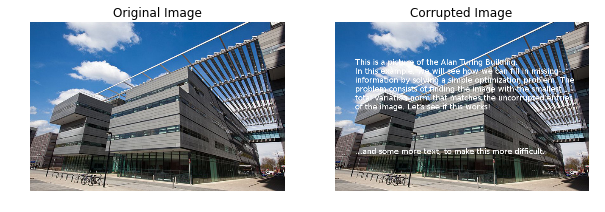

In [16]:
from PIL import Image

# Load the images and convert to numpy arrays for processing.
U = np.array(Image.open("images/alanturing.png"))
Ucorr = np.array(Image.open("images/alanturing-corr.png"))

# Display the images
%matplotlib inline
fig, ax = plt.subplots(1, 2,figsize=(10, 5))

ax[0].imshow(U);
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(Ucorr);
ax[1].set_title("Corrupted Image")
ax[1].axis('off');

plt.show()

After having the images at our disposal, we determine which entries of the corrupted image are known. We store these in a *mask* $M$, with entries $m_{ijk}=1$ if the colour $k$ of the $(i,j)$-th pixel is known, and $0$ otherwise.

In [17]:
# Each image is now an m x n x 3 array, with each pixel represented
# by three numbers between 0 and 255, corresponding to red, green and blue
rows, cols, colours = U.shape

# Create a mask: this is a matrix with a 1 if the corresponding 
# pixel is known, and zero else
M = np.zeros((rows, cols, colours))
for i in range(rows):
    for j in range(cols):
        for k in range(colours):
            if U[i, j, k] == Ucorr[i, j, k]:
                M[i, j, k] = 1

We are now ready to solve the optimization problem using CVXPY. As the problem is rather big ($400\times 600\times 3 = 720000$ variables), it is important to choose a good solver that will solve the problem to sufficient accuracy in an acceptable amount of time. For the example at hand, we choose the SCS solver, which can be specified when calling the **solve** function.

In [18]:
# Determine the variables and constraints
variables = []
constraints = []
for k in range(colours):
    X = Variable(rows, cols)
    # Add variables
    variables.append(X)
    # Add constraints by multiplying the relevant variable matrix elementwise with the mask
    constraints.append(mul_elemwise(M[:, :, k], X) == mul_elemwise(M[:, :, k], Ucorr[:, :, k]))

# Create a problem instance with
objective = Minimize(tv(variables[0],variables[1],variables[2]))

# Create a problem instance and solve it using the SCS solver
prob = Problem(objective, constraints)
prob.solve(verbose=True, solver=SCS)

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 3774831, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 959001, constraints m = 2393007
Cones:	primal zero / dual free vars: 720000
	soc vars: 1673007, soc blks: 239001
Setup time: 3.40e-01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 6.10e+00  5.64e+00  1.00e+00 -2.62e+08  1.57e+07  4.12e-08  2.24e+00 
   100| 2.55e-03  7.42e-04  1.12e-03  8.23e+06  8.25e+06  8.60e-09  4.14e+01 
   200| 8.29e-04  1.91e-04  2.45e-04  8.26e+06  8.27e+06  8.74e-09  8.20

8263910.812250629

Now that we solved the optimization problem, we have a solution stored in 'variables'. We have to transform this back into an image and display the result.

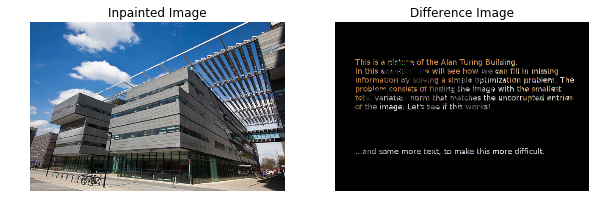

In [19]:
%matplotlib inline

# Load variable values into a single array.
Urec = np.zeros((rows, cols, colours), dtype=np.uint8)
for i in range(colours):
    Urec[:, :, i] = variables[i].value

fig, ax = plt.subplots(1, 2,figsize=(10, 5))

# Display the inpainted image.
ax[0].imshow(Urec);
ax[0].set_title("Inpainted Image")
ax[0].axis('off')

ax[1].imshow(np.abs(Ucorr[:,:,0:3] - Urec));
ax[1].set_title("Difference Image")
ax[1].axis('off');

Another typical structure of images is that the **singular values** of the image, considered as matrix, decay quickly. The **singular value decomposition** (SVD) of a matrix $\mtx{A}\in \R^{m\times n}$ is the matrix product

\begin{equation*}
  \mtx{A} = \mtx{U}\mtx{\Sigma}\mtx{V}^{T},
\end{equation*}

where $\mtx{U}\in \R^{m\times m}$ and $\mtx{V}\in \R^{n\times n}$ are orthogonal matrices, and $\mtx{\Sigma}\in \R^{m\times n}$ is a diagonal matrix with entries $\sigma_{1},\dots,\sigma_{\mathrm{min}\{m,n\}}$ on the diagonal. Instead of minimizing the TV-norm of an image $\mtx{X}$, one may instead try to minimize the **Schatten 1-norm**, defined as the sum of the singular values, $\|\vct{U}\|_{S_1} = \sigma_1+\cdots+\sigma_{\mathrm{min}\{m,n\}}$. The problem is then

\begin{equation*}
  \minimize \|\vct{X}\|_{S_1} \subjto x_{ij} = u_{ij} \text{ for } (i,j) \in \Omega.
\end{equation*}

As we will see towards the end of the course, this is an instance of a type of convex optimization problem known as **semidefinite programming**. Luckily, CVXPY includes the Schatten 1-norm (also known as nuclear norm) as valid objective function, so we don't have to deal with the details of this problem. As the problem is computationally intensive, we just reproduce the result.

![Nuclear norm inpainting](images/nucnorm-inpaint.png)

In this example, the result appears worse as in the problem involving the TV-norm. Alternatively, one may also use the $1$-norm of the image applied to a discrete cosine transfrom (DCT) or a discrete wavelet transform (DWT).

Of course, one could run the above examples for fun with different types of images in an attempt to get rid of certain parts. In the example below, we set a parrot free.

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 9570666, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 2444484, constraints m = 6104028
Cones:	primal zero / dual free vars: 1834560
	soc vars: 4269468, soc blks: 609924
Setup time: 7.54e-01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.#Je+00  1.#Je+00 -1.#Je+00 -1.#Je+00  1.#Je+00  1.#Je+00  1.36e+01 
   100| 1.93e-03  1.03e-03  1.83e-03  4.27e+06  4.29e+06  2.90e-09  2.02e+02 
   160| 7.87e-04  2.58e-04  5.83e-04  4.30e+06  4.31e+06  2.97e-09  3.

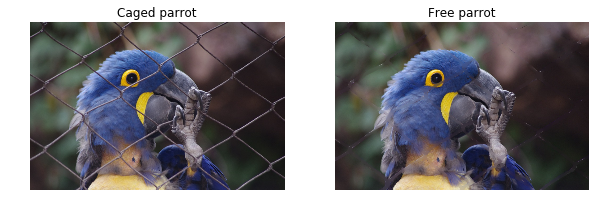

In [20]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from cvxpy import *

# Load the images and convert to numpy arrays for processing.
U = np.array(Image.open("../images/parrot1.png"))
Ucorr = np.array(Image.open("../images/parrot-corr1.png"))

# Each image is now an m x n x 3 array
rows, cols, colours = U.shape

# Create a mask: this is a matrix with a 1 if the corresponding 
# pixel is known, and zero else
M = np.zeros((rows, cols, colours))
for i in range(rows):
    for j in range(cols):
        for k in range(colours):
            if U[i, j, k] == Ucorr[i, j, k]:
                M[i, j, k] = 1
                
# Determine the variables and constraints
variables = []
constraints = []
for k in range(colours):
    X = Variable(rows, cols)
    # Add variables
    variables.append(X)
    # Add constraints by multiplying the relevant variable matrix elementwise with the mask
    constraints.append(mul_elemwise(M[:, :, k], X) == mul_elemwise(M[:, :, k], Ucorr[:, :, k]))

# Create a problem instance with
objective = Minimize(tv(variables[0],variables[1],variables[2]))

# Create a problem instance and solve it using the SCS solver
prob = Problem(objective, constraints)
prob.solve(verbose=True, solver=SCS)

# Load variable values into a single array.
Urec = np.zeros((rows, cols, colours), dtype=np.uint8)
for i in range(colours):
    Urec[:, :, i] = variables[i].value

# Display images
%matplotlib inline
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(U);
ax[0].set_title("Caged parrot")
ax[0].axis('off')
ax[1].imshow(np.abs(Urec));
ax[1].set_title("Free parrot")
ax[1].axis('off');